# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    1.243717
b   -0.575129
c   -0.904327
d   -0.105800
e    0.358576
dtype: float64
a         NaN
b   -1.150259
c   -1.808654
d   -0.211600
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2022,11,30,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 30 2022'
# or alternatively
date = '30/11/2022 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2022-11-30
2022-11-30 10:45:10.000015
30/11/2022 10:45:00
DatetimeIndex(['2022-11-30 10:45:00', '2022-12-01 10:45:00',
               '2022-12-02 10:45:00', '2022-12-03 10:45:00',
               '2022-12-04 10:45:00', '2022-12-05 10:45:00',
               '2022-12-06 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 10:45:01',
               '2022-11-30 10:45:02', '2022-11-30 10:45:03',
               '2022-11-30 10:45:04', '2022-11-30 10:45:05',
               '2022-11-30 10:45:06', '2022-11-30 10:45:07',
               '2022-11-30 10:45:08', '2022-11-30 10:45:09',
               ...
               '2022-11-30 11:44:50', '2022-11-30 11:44:51',
               '2022-11-30 11:44:52', '2022-11-30 11:44:53',
               '2022-11-30 11:44:54', '2022-11-30 11:44:55',
               '2022-11-30 11:44:56', '2022-11-30 11:44:57',
               '2022-11-30 11:44:58', '2022-11-30 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2022-11-30':'2022-12-01'], '\n') # Note - includes end time


2022-11-30 10:45:00     8.669944
2022-12-01 10:45:00    10.730338
2022-12-02 10:45:00     9.032250
2022-12-03 10:45:00    10.756759
Freq: D, dtype: float64 

2022-11-30 10:45:00     8.669944
2022-12-01 10:45:00    10.730338
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/30/2022 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,-0.906931
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,1.055420
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,-0.144050
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,0.544044
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,1.208592
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,-0.429820
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,0.324088
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,2.659587
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,0.958353


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [15]:
df.head(2) # The first two rows

,A,B,C,D
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,-0.906931


In [16]:
df.tail(4) # Last four rows

,A,B,C,D
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,-0.429820
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,0.324088
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,2.659587
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,0.958353


In [18]:
df.index # Indexes (time index in this case)

DatetimeIndex(['2022-11-30 10:45:00', '2022-11-30 11:45:00',
               '2022-11-30 12:45:00', '2022-11-30 13:45:00',
               '2022-11-30 14:45:00', '2022-11-30 15:45:00',
               '2022-11-30 16:45:00', '2022-11-30 17:45:00',
               '2022-11-30 18:45:00', '2022-11-30 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
df.columns # Usually the columns are the VARIABLES YOU CARE ABOUT

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values # Attay of the variables and values

array([[ 2.19197576,  0.45520974,  0.60942328,  0.74555269],
       [-0.23915634,  2.11517418,  0.48468932, -0.90693062],
       [-1.23250585, -0.47685406, -1.14210546,  1.05542001],
       [ 0.40455107, -1.28807542,  1.15258576, -0.14405003],
       [-1.27796806, -0.44998709, -0.9625654 ,  0.54404354],
       [-1.59775217, -0.73018548, -0.2722587 ,  1.20859179],
       [-1.25274715, -0.99293875, -0.53083786, -0.42982019],
       [ 0.6471785 , -0.47245164,  0.18548472,  0.32408799],
       [ 0.58066473, -1.0551495 ,  0.22390887,  2.65958689],
       [ 0.30714141, -0.25283191,  1.04194566,  0.9583532 ]])

In [22]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.146862,-0.314809,0.079027,0.601484
std,1.198830,0.983120,0.790876,0.996299
min,-1.597752,-1.288075,-1.142105,-0.906931
25%,-1.247687,-0.927250,-0.466193,-0.027016
50%,0.033993,-0.474653,0.204697,0.644798
75%,0.536636,-0.302121,0.578240,1.031153
max,2.191976,2.115174,1.152586,2.659587


In [23]:
df.T # Traspose of the DataFrame

,2022-11-30 10:45:00,2022-11-30 11:45:00,2022-11-30 12:45:00,2022-11-30 13:45:00,2022-11-30 14:45:00,2022-11-30 15:45:00,2022-11-30 16:45:00,2022-11-30 17:45:00,2022-11-30 18:45:00,2022-11-30 19:45:00
A,2.191976,-0.239156,-1.232506,0.404551,-1.277968,-1.597752,-1.252747,0.647179,0.580665,0.307141
B,0.455210,2.115174,-0.476854,-1.288075,-0.449987,-0.730185,-0.992939,-0.472452,-1.055149,-0.252832
C,0.609423,0.484689,-1.142105,1.152586,-0.962565,-0.272259,-0.530838,0.185485,0.223909,1.041946
D,0.745553,-0.906931,1.055420,-0.144050,0.544044,1.208592,-0.429820,0.324088,2.659587,0.958353


In [26]:
df.sort_index(axis=0,ascending=True) # When you have more indexes, you can sort by index

,A,B,C,D
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,-0.906931
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,1.055420
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,-0.144050
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,0.544044
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,1.208592
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,-0.429820
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,0.324088
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,2.659587
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,0.958353


In [27]:
df.sort_values(by="C") # Sort the rows according to the column values "C"

,A,B,C,D
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,1.055420
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,0.544044
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,-0.429820
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,1.208592
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,0.324088
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,2.659587
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,-0.906931
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,0.958353
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,-0.144050


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [28]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2022-11-30 10:45:00    2.191976
2022-11-30 11:45:00   -0.239156
2022-11-30 12:45:00   -1.232506
2022-11-30 13:45:00    0.404551
2022-11-30 14:45:00   -1.277968
2022-11-30 15:45:00   -1.597752
2022-11-30 16:45:00   -1.252747
2022-11-30 17:45:00    0.647179
2022-11-30 18:45:00    0.580665
2022-11-30 19:45:00    0.307141
Freq: H, Name: A, dtype: float64 

2022-11-30 10:45:00    2.191976
2022-11-30 11:45:00   -0.239156
2022-11-30 12:45:00   -1.232506
2022-11-30 13:45:00    0.404551
2022-11-30 14:45:00   -1.277968
2022-11-30 15:45:00   -1.597752
2022-11-30 16:45:00   -1.252747
2022-11-30 17:45:00    0.647179
2022-11-30 18:45:00    0.580665
2022-11-30 19:45:00    0.307141
Freq: H, Name: A, dtype: float64


In [29]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2022-11-30 10:45:00":"2022-11-30 12:45:00"])

                            A         B         C         D
2022-11-30 10:45:00  2.191976  0.455210  0.609423  0.745553
2022-11-30 11:45:00 -0.239156  2.115174  0.484689 -0.906931
2022-11-30 12:45:00 -1.232506 -0.476854 -1.142105  1.055420
                            A         B         C         D
2022-11-30 10:45:00  2.191976  0.455210  0.609423  0.745553
2022-11-30 11:45:00 -0.239156  2.115174  0.484689 -0.906931
2022-11-30 12:45:00 -1.232506 -0.476854 -1.142105  1.055420


### Selection by label

In [30]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    2.191976
B    0.455210
C    0.609423
D    0.745553
Name: 2022-11-30 10:45:00, dtype: float64

In [31]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2022-11-30 10:45:00,2.191976,0.455210
2022-11-30 11:45:00,-0.239156,2.115174
2022-11-30 12:45:00,-1.232506,-0.476854
2022-11-30 13:45:00,0.404551,-1.288075
2022-11-30 14:45:00,-1.277968,-0.449987
2022-11-30 15:45:00,-1.597752,-0.730185
2022-11-30 16:45:00,-1.252747,-0.992939
2022-11-30 17:45:00,0.647179,-0.472452
2022-11-30 18:45:00,0.580665,-1.055149
2022-11-30 19:45:00,0.307141,-0.252832


In [32]:
# showing label slicing, both endpoints are included:
df.loc['2022-11-30 14:45:00':'2022-11-30 16:45:00',['A','B']]

,A,B
2022-11-30 14:45:00,-1.277968,-0.449987
2022-11-30 15:45:00,-1.597752,-0.730185
2022-11-30 16:45:00,-1.252747,-0.992939


In [33]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-0.2391563404026949
-0.2391563404026949


### Selecting by position

In [39]:
# We can select the data using the indexes (like in np)
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.404551
B   -1.288075
C    1.152586
D   -0.144050
Name: 2022-11-30 13:45:00, dtype: float64 

                            A         B
2022-11-30 13:45:00  0.404551 -1.288075
2022-11-30 14:45:00 -1.277968 -0.449987


In [35]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2022-11-30 11:45:00,-0.239156,0.484689
2022-11-30 12:45:00,-1.232506,-1.142105
2022-11-30 14:45:00,-1.277968,-0.962565


In [36]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2022-11-30 11:45:00 -0.239156  2.115174  0.484689 -0.906931
2022-11-30 12:45:00 -1.232506 -0.476854 -1.142105  1.055420 

                            B         C
2022-11-30 10:45:00  0.455210  0.609423
2022-11-30 11:45:00  2.115174  0.484689
2022-11-30 12:45:00 -0.476854 -1.142105
2022-11-30 13:45:00 -1.288075  1.152586
2022-11-30 14:45:00 -0.449987 -0.962565
2022-11-30 15:45:00 -0.730185 -0.272259
2022-11-30 16:45:00 -0.992939 -0.530838
2022-11-30 17:45:00 -0.472452  0.185485
2022-11-30 18:45:00 -1.055149  0.223909
2022-11-30 19:45:00 -0.252832  1.041946


In [38]:
# selecting an individual element by position
df.iloc[1,1] # It uses the indexes as 0, 1, 2, 3, ....
df.iat[1,1] # It uses the actual names of the rows/columns


2.11517418452168

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [44]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0] # Selects the rows with a determined condition

#df[df['B'] > 210] # This doesn't select anything


,A,B,C,D
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,-0.906931


In [46]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]
# a DataFrame with the same shape is returned, with NaN's where condition is not met

# Basically df>0 creates a mask and, when it is applied to the matrix, you obtain NaN for False

,A,B,C,D
2022-11-30 10:45:00,2.191976,0.455210,0.609423,0.745553
2022-11-30 11:45:00,NaN,2.115174,0.484689,NaN
2022-11-30 12:45:00,NaN,NaN,NaN,1.055420
2022-11-30 13:45:00,0.404551,NaN,1.152586,NaN
2022-11-30 14:45:00,NaN,NaN,NaN,0.544044
2022-11-30 15:45:00,NaN,NaN,NaN,1.208592
2022-11-30 16:45:00,NaN,NaN,NaN,NaN
2022-11-30 17:45:00,0.647179,NaN,0.185485,0.324088
2022-11-30 18:45:00,0.580665,NaN,0.223909,2.659587
2022-11-30 19:45:00,0.307141,NaN,1.041946,0.958353


### Setting

Combination of selection and setting of values

In [49]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5
# Creation of a new colum, that is then appended

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df # This prints the table


,A,B,C,D,E,E prime
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18


In [52]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
# I then append a new column, where I put the value of the cosine of the values of 'E' (in degrees)
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)

df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


In [56]:
# another example of global setting
df2=df.copy() # This copies the values on another table

df2[df2>0] = -df2 # And then switches the positive data in the copied DataFrame
df2

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,-0.455210,-0.609423,-5,0.0,0,-1.000000
2022-11-30 11:45:00,-0.239156,-2.115174,-0.484689,-5,-0.5,-2,-0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,-5,-1.0,-4,-0.999848
2022-11-30 13:45:00,-0.404551,-1.288075,-1.152586,-5,-1.5,-6,-0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,-5,-2.0,-8,-0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,-5,-2.5,-10,-0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,-5,-3.0,-12,-0.998630
2022-11-30 17:45:00,-0.647179,-0.472452,-0.185485,-5,-3.5,-14,-0.998135
2022-11-30 18:45:00,-0.580665,-1.055149,-0.223909,-5,-4.0,-16,-0.997564
2022-11-30 19:45:00,-0.307141,-0.252832,-1.041946,-5,-4.5,-18,-0.996917


In [58]:
df # It doesn't affect the initial DataFrame

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [59]:
# Dropping by column
df.drop(['E prime'], axis=1) # Removes the column 'E prime'

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,0.996917


In [60]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


In [61]:
df # But the drop operation doesn't apply on the original DataFrame, but only in a specific place

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


In [64]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2022-11-30 18:45:00"))

# Here you should have given the direct time dependance

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [65]:
df_wNan = df[df>0]
df_wNan # Creates the table with NaN

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.455210,0.609423,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,2.115174,0.484689,5,0.5,2.0,0.999962
2022-11-30 12:45:00,NaN,NaN,NaN,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.404551,NaN,1.152586,5,1.5,6.0,0.999657
2022-11-30 14:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2022-11-30 15:45:00,NaN,NaN,NaN,5,2.5,10.0,0.999048
2022-11-30 16:45:00,NaN,NaN,NaN,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.647179,NaN,0.185485,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.580665,NaN,0.223909,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.307141,NaN,1.041946,5,4.5,18.0,0.996917


In [66]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any') # It drops all the lines

,A,B,C,D,E,E prime,cosine


In [73]:
# getting a mask
df_wNan.isna() # mask that finds the NaN
# df_wNan.notna() # mask that finds the not NaN

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,True,False,False,False,True,True,False
2022-11-30 11:45:00,True,False,False,False,False,False,False
2022-11-30 12:45:00,True,True,True,False,False,False,False
2022-11-30 13:45:00,False,True,False,False,False,False,False
2022-11-30 14:45:00,True,True,True,False,False,False,False
2022-11-30 15:45:00,True,True,True,False,False,False,False
2022-11-30 16:45:00,True,True,True,False,False,False,False
2022-11-30 17:45:00,False,True,False,False,False,False,False
2022-11-30 18:45:00,False,True,False,False,False,False,False
2022-11-30 19:45:00,False,True,False,False,False,False,False


In [74]:
# filling missing data
df_wNan.fillna(value=0)

# This creates the data, where we had NaN

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0.0,1.000000
2022-11-30 11:45:00,0.000000,2.115174,0.484689,5,0.5,2.0,0.999962
2022-11-30 12:45:00,0.000000,0.000000,0.000000,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.404551,0.000000,1.152586,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.000000,0.000000,0.000000,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.000000,0.000000,0.000000,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.000000,0.000000,0.000000,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.647179,0.000000,0.185485,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.580665,0.000000,0.223909,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.307141,0.000000,1.041946,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [77]:
df_wNan.fillna(method='pad')
# This creates the data, copying from the previous/following data in the table, instead of NaN

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,NaN,0.455210,0.609423,5,NaN,NaN,1.000000
2022-11-30 11:45:00,NaN,2.115174,0.484689,5,0.5,2.0,0.999962
2022-11-30 12:45:00,NaN,2.115174,0.484689,5,1.0,4.0,0.999848
2022-11-30 13:45:00,0.404551,2.115174,1.152586,5,1.5,6.0,0.999657
2022-11-30 14:45:00,0.404551,2.115174,1.152586,5,2.0,8.0,0.999391
2022-11-30 15:45:00,0.404551,2.115174,1.152586,5,2.5,10.0,0.999048
2022-11-30 16:45:00,0.404551,2.115174,1.152586,5,3.0,12.0,0.998630
2022-11-30 17:45:00,0.647179,2.115174,0.185485,5,3.5,14.0,0.998135
2022-11-30 18:45:00,0.580665,2.115174,0.223909,5,4.0,16.0,0.997564
2022-11-30 19:45:00,0.307141,2.115174,1.041946,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [78]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.366059
B         -0.314809
C          0.079027
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2022-11-30 10:45:00    1.009233
2022-11-30 11:45:00    1.551524
2022-11-30 12:45:00    1.164055
2022-11-30 13:45:00    1.966960
2022-11-30 14:45:00    1.901267
2022-11-30 15:45:00    2.271265
2022-11-30 16:45:00    2.603158
2022-11-30 17:45:00    3.408335
2022-11-30 18:45:00    3.678141
2022-11-30 19:45:00    4.227596
Freq: H, dtype: float64 



In [81]:
# global operations on columns
df.apply(np.cumsum)

# Cumulative sum over the columns

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.570384,1.094113,10,0.5,2,1.999962
2022-11-30 12:45:00,-1.471662,2.093530,-0.047993,15,1.5,6,2.999810
2022-11-30 13:45:00,-1.067111,0.805454,1.104593,20,3.0,12,3.999467
2022-11-30 14:45:00,-2.345079,0.355467,0.142027,25,5.0,20,4.998858
2022-11-30 15:45:00,-3.942831,-0.374718,-0.130231,30,7.5,30,5.997906
2022-11-30 16:45:00,-5.195579,-1.367657,-0.661069,35,10.5,42,6.996536
2022-11-30 17:45:00,-4.548400,-1.840109,-0.475584,40,14.0,56,7.994670
2022-11-30 18:45:00,-3.967735,-2.895258,-0.251675,45,18.0,72,8.992234
2022-11-30 19:45:00,-3.660594,-3.148090,0.790270,50,22.5,90,9.989152


In [82]:
df

,A,B,C,D,E,E prime,cosine
2022-11-30 10:45:00,0.000000,0.455210,0.609423,5,0.0,0,1.000000
2022-11-30 11:45:00,-0.239156,2.115174,0.484689,5,0.5,2,0.999962
2022-11-30 12:45:00,-1.232506,-0.476854,-1.142105,5,1.0,4,0.999848
2022-11-30 13:45:00,0.404551,-1.288075,1.152586,5,1.5,6,0.999657
2022-11-30 14:45:00,-1.277968,-0.449987,-0.962565,5,2.0,8,0.999391
2022-11-30 15:45:00,-1.597752,-0.730185,-0.272259,5,2.5,10,0.999048
2022-11-30 16:45:00,-1.252747,-0.992939,-0.530838,5,3.0,12,0.998630
2022-11-30 17:45:00,0.647179,-0.472452,0.185485,5,3.5,14,0.998135
2022-11-30 18:45:00,0.580665,-1.055149,0.223909,5,4.0,16,0.997564
2022-11-30 19:45:00,0.307141,-0.252832,1.041946,5,4.5,18,0.996917


In [83]:
df.apply(lambda x: x.max() - x.min()) # One can use the lambda functions

A           2.244931
B           3.403250
C           2.294691
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [84]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2022-11-30 10:45:00    0.455210
2022-11-30 11:45:00    1.876018
2022-11-30 12:45:00   -1.709360
2022-11-30 13:45:00   -0.883524
2022-11-30 14:45:00   -1.727955
2022-11-30 15:45:00   -2.327938
2022-11-30 16:45:00   -2.245686
2022-11-30 17:45:00    0.174727
2022-11-30 18:45:00   -0.474485
2022-11-30 19:45:00    0.054310
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [87]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

# The file is a csv, but Pandas knows that the first Row is the one with the columns
file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

# You have a million entries (usually in research, we have billions of rows)
# This a typical DataFrame (and we usually have million of those)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [91]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

# One operation with the data of all the single rows

In [92]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [93]:
# the old slooow way: cycle on the raws
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

# The operations that are the same for every single row are much more fast, if done with DataFrames
# It took 0,1s instead of 36,3s

# OPERATIONS PER COLUMNS ARE FAST
# OPERATIONS PER ROW ARE USUALLY HARD TO IMPLEMENT

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [94]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.788398,-0.732097,1.316979,1.734219
1,-0.056031,-1.957212,0.050268,-0.076736
2,-0.913552,-0.948893,-0.915872,0.189344
3,-0.567056,-1.040079,-0.553121,1.241924
4,-2.409215,-0.213896,-0.833114,-1.695184
5,-0.652851,0.407542,-1.700117,-0.305334
6,0.064967,-1.394739,-0.571648,-0.780404
7,0.869439,-0.518262,-0.721903,-0.994756
8,-0.355618,0.295385,-2.102724,0.528169
9,1.029534,-0.030047,-1.649907,-0.305699


In [95]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.788398 -0.732097  1.316979  1.734219
 1 -0.056031 -1.957212  0.050268 -0.076736
 2 -0.913552 -0.948893 -0.915872  0.189344,
           0         1         2         3
 3 -0.567056 -1.040079 -0.553121  1.241924
 4 -2.409215 -0.213896 -0.833114 -1.695184
 5 -0.652851  0.407542 -1.700117 -0.305334
 6  0.064967 -1.394739 -0.571648 -0.780404,
           0         1         2         3
 7  0.869439 -0.518262 -0.721903 -0.994756
 8 -0.355618  0.295385 -2.102724  0.528169
 9  1.029534 -0.030047 -1.649907 -0.305699]

In [96]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.788398,-0.732097,1.316979,1.734219
1,-0.056031,-1.957212,0.050268,-0.076736
2,-0.913552,-0.948893,-0.915872,0.189344
3,-0.567056,-1.040079,-0.553121,1.241924
4,-2.409215,-0.213896,-0.833114,-1.695184
5,-0.652851,0.407542,-1.700117,-0.305334
6,0.064967,-1.394739,-0.571648,-0.780404
7,0.869439,-0.518262,-0.721903,-0.994756
8,-0.355618,0.295385,-2.102724,0.528169
9,1.029534,-0.030047,-1.649907,-0.305699


In [97]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

/tmp/ipykernel_591/3203204840.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.788398,-0.732097,1.316979,1.734219
1,-0.056031,-1.957212,0.050268,-0.076736
2,-0.913552,-0.948893,-0.915872,0.189344
3,-0.567056,-1.040079,-0.553121,1.241924
4,-2.409215,-0.213896,-0.833114,-1.695184
5,-0.652851,0.407542,-1.700117,-0.305334
6,0.064967,-1.394739,-0.571648,-0.780404
7,0.869439,-0.518262,-0.721903,-0.994756
8,-0.355618,0.295385,-2.102724,0.528169
9,1.029534,-0.030047,-1.649907,-0.305699


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [100]:
# There is a lot of documentation on this

left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [101]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.989474,-0.682020
1,bar,one,1.804827,-0.517521
2,foo,two,0.423407,0.455584
3,bar,three,2.365522,-0.423087
4,foo,two,-1.694800,0.692723
5,bar,two,-0.130679,-0.839855
6,foo,one,-1.657973,-0.615148
7,foo,three,-0.521278,-0.222764


In [103]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

# Group and then take the sum of the values

,C,D
A,,
bar,4.039671,-1.780462
foo,-4.440118,-0.371627


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [105]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

# Now we can create a three dimentional DataFrames (very used)
s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       1.050028
       two       1.319494
baz    one       0.633340
       two       1.807938
foo    one       1.568743
       two       1.191485
qux    one      -1.073556
       two       0.783488
dtype: float64


In [108]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

# You can use Group and sum over more indexes

C         D
A   B                        
bar one    1.804827 -0.517521
    three  2.365522 -0.423087
    two   -0.130679 -0.839855
foo one   -2.647447 -1.297169
    three -0.521278 -0.222764
    two   -1.271393  1.148306

In [109]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    1.804827
            D   -0.517521
     three  C    2.365522
            D   -0.423087
     two    C   -0.130679
            D   -0.839855
foo  one    C   -2.647447
            D   -1.297169
     three  C   -0.521278
            D   -0.222764
     two    C   -1.271393
            D    1.148306
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot: >

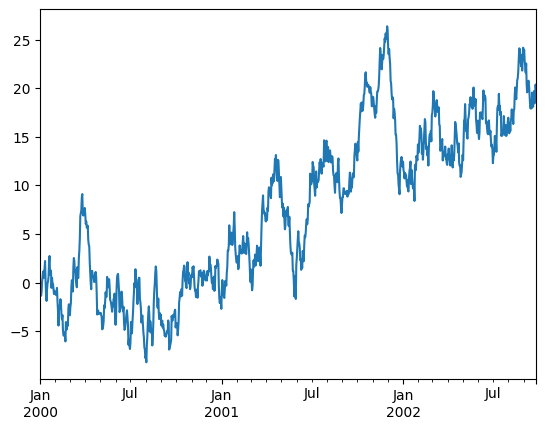

In [111]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

# You can create plot from DataFrame

<Figure size 640x480 with 0 Axes>

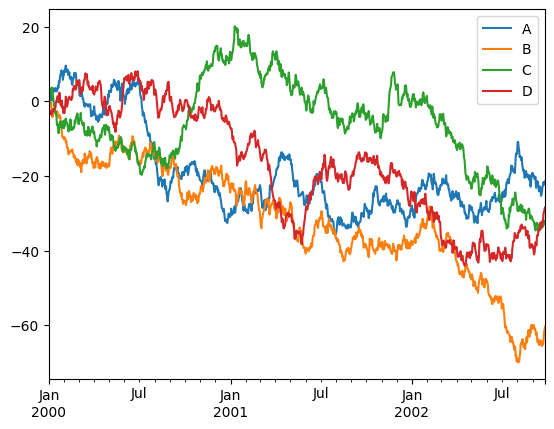

In [112]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')